![](img/572_banner.png)
%%HTML

<script src="require.js"></script>


# Regression

**Mahmood Amintoosi, Spring 2026**

Computer Science Dept, Ferdowsi University of Mashhad


In [1]:
# Auto-setup when running on Google Colab
import os
if 'google.colab' in str(get_ipython()) and not os.path.exists('/content/neural-networks'):
    !git clone -q https://github.com/fum-cs/neural-networks.git /content/neural-networks
    !pip --quiet install -r /content/neural-networks/requirements_colab.txt
    %cd neural-networks/notebooks

In [2]:
import warnings

warnings.filterwarnings("ignore")
import numpy as np
from sklearn.model_selection import train_test_split

# This is needed to render the plots
from utils.utils import *

## Linear Model

Suppose that the true model is denoted by $y = b + m x + \epsilon$ and the estimated model denoted by $\hat{y}$ (Eq. 23.2 of Zaki book {cite}`zaki2020data`):


$$
\begin{aligned}
\\
\hat{y} &= \beta_0 + \beta_1 x  \\
&= \beta_0 x_0+ \beta_1 x_1  \quad \ \textrm{(ESL Notation)}\\
&= \theta_0 x_0+ \theta_1 x_1 \quad \ \ \textrm{(Ng Notation)}\\
&= w_0 x_0+ w_1 x_1 \quad\textrm{(Zaki Notation)}\\
\\
&\textrm{where:}\\
&x_0 = 1
\end{aligned}
$$


If we have:

$$
\mathbf{x} = \begin{bmatrix} x_0\\x_1 \end{bmatrix},
\mathbf{w} = \begin{bmatrix} w_0\\w_1 \end{bmatrix}
$$

then $\hat{y}$ can be considered as dot product of two vectors:

$$
\begin{aligned}
\hat{y} = w_0 x_0+ w_1 x_1 = \mathbf{w}^T\mathbf{x}
\end{aligned}
$$

If $i^{th}$ instance is shown by $\mathbf{x}_i$

$$
\mathbf{x}_i = \begin{bmatrix} x_{i,0}\\x_{i,1} \end{bmatrix},
$$

then:

$$
\begin{aligned}
\hat{y}_i = w_0 x_{i,0}+ w_1 x_{i,1}
\end{aligned}
$$

Sum of Squared Error (SSE):

$$
\begin{aligned}
\textrm{SSE} &= \sum_{i=1}^n{error_i}^2
\\
&= \sum_{i=1}^n{(\hat{y_i} - y_i)}^2
\\
&= \sum_{i=1}^n{(w_0 x_{i,0} + w_1 x_{i,1} - y_i)}^2\\
&= \sum_{i=1}^n{(\mathbf{w}^T\mathbf{x}_{i} - y_i)}^2
= \sum_{i=1}^n{(\mathbf{x}_{i}^T\mathbf{w} - y_i)}^2\\
&= ||X\mathbf{w} - \mathbf{y}||_2^2 = (X\mathbf{w} - \mathbf{y})^T(X\mathbf{w} - \mathbf{y})
\end{aligned}
$$

where:

$$
X = \begin{bmatrix}
    \mathbf{x_1}^T       \\
    \mathbf{x_2}^T   \\
    \vdots \\
    \mathbf{x_n}^T
\end{bmatrix},
\mathbf{y} = \begin{bmatrix}
    y_1       \\
    y_2   \\
    \vdots \\
    y_n
\end{bmatrix}
$$


## Data Generation


### Synthetic Data Generation


In [3]:
true_w0 = 1  # b in mx+b
true_w1 = 2  # m in mx+b
N = 100

# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)

epsilon = 0.1 * np.random.randn(N, 1)
y = true_w0 + true_w1 * x + epsilon

# Add a column of 1s to x

# ones = np.ones((N, 1))
# X = np.concatenate([ones, x],axis=1)
X = np.insert(x, 0, 1, axis=1)
print(x.shape, X.shape)
print(x[:3])
print(y[:3])

(100, 1) (100, 2)
[[0.37454012]
 [0.95071431]
 [0.73199394]]
[[1.75778494]
 [2.87152788]
 [2.47316396]]


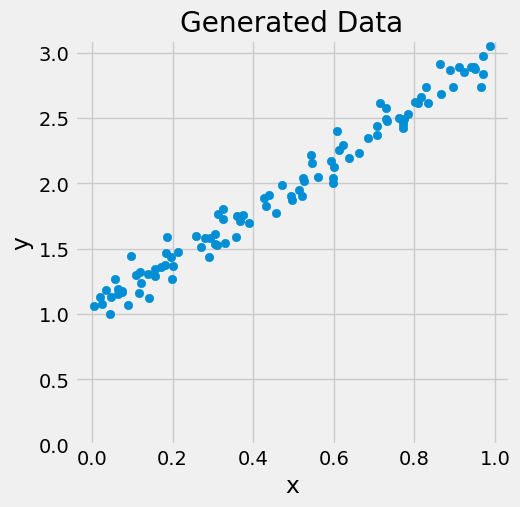

In [4]:
figure0(x, y)

## Normal Equations


The Normal Equations provide a closed-form solution for finding the optimal parameters (coefficients) that minimize the cost function (usually the mean squared error) in linear regression.

- The Normal Equations are derived by setting the partial derivatives of the cost function with respect to each coefficient to zero.
- The Closed Form Solution refers to finding the optimal parameters directly using a mathematical formula, rather than an iterative optimization process.

We have to minimize: $||X\mathbf{w} - \mathbf{y}||_2^2$ wrt $\mathbf{w}$, which is equal to the famous form $min_{x}||Ax - b||_2^2$.
Temporary we use $\beta$, instead of $\mathbf{w}$ and ignore the bold faces of letters; hence we have to minimize $||X\beta-y||_2^2$

$$
\begin{aligned}
SSE&=||X\beta-y||_2^2 = (X\beta-y)^T(X\beta-y)\\
&=((X\beta)^T-y^T)(X\beta-y) =(\beta^TX^T-y^T)(X\beta-y) \\
&=\beta^TX^T X\beta - \beta^T X^Ty -y^TX\beta + y^Ty\\
&=\beta^T M\beta - (X\beta)^Ty -y^TX\beta + y^Ty \qquad {(M=X^T X)}\\
&=\beta^T M\beta - 2y^TX\beta + y^Ty \qquad\qquad{(A^TB=B^TA)}\\
&=\beta^T M\beta - 2z^T\beta + y^Ty \qquad\qquad{(z^T=y^TX, z=X^Ty)}
\end{aligned}
$$

We Know that (See Matrix Calculus in [Appendix A](appendixA_gradients.ipynb) and [Wikipedia](https://en.wikipedia.org/wiki/Matrix_calculus)):

$$\frac{\partial y^Tx}{\partial x}=\frac{\partial x^Ty}{\partial x}=y$$
$$\frac{\partial Mx}{\partial x}=M$$

and if $M$ be a symmetric matrix:

$$\frac{\partial x^TMx}{\partial x}=2Mx$$

Hence:

$$
\begin{aligned}
\frac{\partial SSE}{\partial \beta} &= \frac{\partial (\beta^T M\beta - 2z^T\beta + y^Ty)}{\partial \beta} \\
&= 2M\beta-2z = 2X^TX\beta-2X^T y
\end{aligned}
$$

Set the derivative equal to zero:

$$
\begin{aligned}
&\frac{\partial SSE}{\partial \beta}=0 \\
\Rightarrow & 2 X^TX\beta - 2X^T y = 0\\
\Rightarrow & X^TX\beta = X^Ty \\
\Rightarrow & \beta = (X^TX)^{-1}X^Ty \\
\end{aligned}
$$

and with our previous notation:
$\mathbf{w} = (X^TX)^{-1}X^T\mathbf{y}$


In [ ]:
w = np.linalg.inv(X.T @ X) @ X.T @ y
w

array([[1.02150962],
       [1.95402268]])

## Using Scikit-learn


In [6]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(x, y)
print(linreg.intercept_, linreg.coef_)

[1.02150962] [[1.95402268]]


If we have _augmented data matrix_ $X \in \mathbb{R}^{n\times (d+1)}$, we have to set `fit_intercept=False`. In eq. (23.20) of Zaki this is denoted by $\tilde{D}$.


In [7]:
linreg = LinearRegression(fit_intercept=False)
linreg.fit(X, y)
print(linreg.coef_)

[[1.02150962 1.95402268]]


## Bivariate Regression

In **bivariate regression**, we have **two variables**: one is the **predictor variable** (also known as the **feature**), and the other is the **response variable** (also known as the **target**).

1. **Predictor Variable (Feature)**:

   - The **predictor variable** (often denoted as **x**) is the input variable that we use to predict or explain the variation in the response variable.
   - In machine learning, this is equivalent to a **feature**. Features represent the characteristics or attributes of the data points.
   - For example, in a housing price prediction model, features could include square footage, number of bedrooms, location, etc.

2. **Response Variable (Target)**:
   - The **response variable** (often denoted as **y**) is the output variable that we are trying to predict or understand based on the predictor variable.
   - In machine learning, this is equivalent to the **target**. The target represents the value we want to predict.
   - For the housing price prediction model, the target would be the actual sale price of a house.

So, in summary, bivariate regression involves analyzing the relationship between two variables: one (the feature) is used to predict or explain the behavior of the other (the target). These terms are commonly used in both statistics and machine learning.

For further information about Multivariate Multiple Regression, see [this blog post of Faradars](https://blog.faradars.org/multiple-linear-regression/).


According to [Sections 23.2 of Zaki book](https://www.cs.rpi.edu/~zaki/DMML/slides/pdf/ychap23.pdf), $b$ and $w$ in $\hat{y}=b+wx$, can be calculated as follows:


$b = \mu_y - w\mu_x, \quad
w = \frac{cov(x,y)}{var(x)}$


In [8]:
x.squeeze().shape, y.shape

((100,), (100, 1))

In [9]:
# Setting ddof=0 to use the biased estimator
covariance_matrix = np.cov(x.squeeze(), y.squeeze(), ddof=0)

w = covariance_matrix[0, 1] / np.var(x)

b = np.mean(y) - w * np.mean(x)

b, w

(1.0215096157546752, 1.954022677287696)

In [54]:
sigma_xy = np.mean((y - np.mean(y)) * (x - np.mean(x)))
w = sigma_xy / np.var(x)
b = np.mean(y) - w * np.mean(x)
b, w
# sigma_xy, sigma_xy/np.var(x), w

(1.0215096157546752, 1.954022677287696)

# Gradient Descent

<hr>


In this section we are going to introduce the basic concepts underlying _gradient descent_. Some materials are borrowed from [D2L](https://d2l.ai/chapter_optimization/gd.html).

### One-Dimensional Gradient Descent

Gradient descent in one dimension is an excellent example to explain why the gradient descent algorithm may reduce the value of the objective function. Consider some continuously differentiable real-valued function $f: \mathbb{R} \rightarrow \mathbb{R}$. Using a Taylor expansion we obtain

$$f(x + h) = f(x) + h f'(x) + \mathcal{O}(h^2).$$

That is, in first-order approximation $f(x+h)$ is given by the function value $f(x)$ and the first derivative $f'(x)$ at $x$. It is not unreasonable to assume that for small $h$ moving in the direction of the negative gradient will decrease $f$. To keep things simple we pick a fixed step size $\eta > 0$ and choose $h = -\eta f'(x)$. Plugging this into the Taylor expansion above we get

$$f(x - \eta f'(x)) = f(x) - \eta f'^2(x) + \mathcal{O}(\eta^2 f'^2(x)).$$

If the derivative $f'(x) \neq 0$ does not vanish we make progress since $\eta f'^2(x)>0$. Moreover, we can always choose $\eta$ small enough for the higher-order terms to become irrelevant. Hence we arrive at

$$f(x - \eta f'(x)) \lessapprox f(x).$$

This means that, if we use

$$x \leftarrow x - \eta f'(x)$$

to iterate $x$, the value of function $f(x)$ might decline. Therefore, in gradient descent we first choose an initial value $x$ and a constant $\eta > 0$ and then use them to continuously iterate $x$ until the stop condition is reached, for example, when the magnitude of the gradient $|f'(x)|$ is small enough or the number of iterations has reached a certain value.


## Gradient Descent on $f(x)=x^2$

For simplicity we choose the objective function $f(x)=x^2$ to illustrate how to implement gradient descent. Although we know that $x=0$ is the solution to minimize $f(x)$, we still use this simple function to observe how $x$ changes.


x = 9.00, f'(x) = 18.00, -lr*f'(x)=-1.80
x = 7.20, f'(x) = 14.40, -lr*f'(x)=-1.44
x = 5.76, f'(x) = 11.52, -lr*f'(x)=-1.15
x = 4.61, f'(x) =  9.22, -lr*f'(x)=-0.92
x = 3.69, f'(x) =  7.37, -lr*f'(x)=-0.74
x = 2.95, f'(x) =  5.90, -lr*f'(x)=-0.59
x = 2.36, f'(x) =  4.72, -lr*f'(x)=-0.47
x = 1.89, f'(x) =  3.77, -lr*f'(x)=-0.38
x = 1.51, f'(x) =  3.02, -lr*f'(x)=-0.30
x = 1.21, f'(x) =  2.42, -lr*f'(x)=-0.24
x = 0.97, f'(x) =  1.93, -lr*f'(x)=-0.19
x = 0.77, f'(x) =  1.55, -lr*f'(x)=-0.15
x = 0.62, f'(x) =  1.24, -lr*f'(x)=-0.12
x = 0.49, f'(x) =  0.99, -lr*f'(x)=-0.10
x = 0.40, f'(x) =  0.79, -lr*f'(x)=-0.08


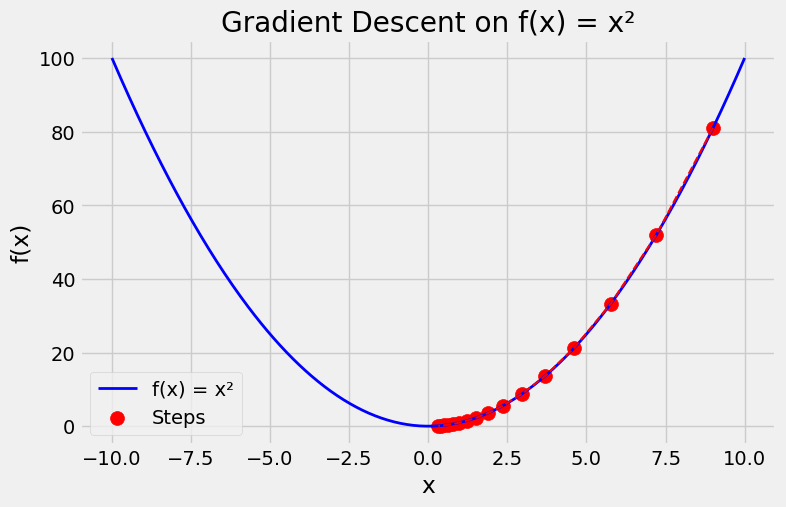

In [55]:
# Defining a simple quadratic function and its derivative
f = lambda x: x**2
f_prime = lambda x: 2 * x

# Generating values
x = np.linspace(-10, 10, 400)
y = f(x)

# Gradient descent settings
learning_rate = 0.1
x_start = 9.0  # Starting point
steps = [x_start]
n_iterations = 15

# Gradient Descent Iteration
for _ in range(n_iterations):
    print(
        "x = {:4.2f}, f'(x) = {:5.2f}, -lr*f'(x)={:5.2f}".format(
            x_start, f_prime(x_start), -learning_rate * f_prime(x_start)
        )
    )
    x_start = x_start - learning_rate * f_prime(x_start)
    steps.append(x_start)

# Plotting the function
plt.figure(figsize=(8, 5))
plt.plot(x, y, lw=2, color="blue", label="f(x) = x²")

# Plotting the steps
plt.scatter(steps, f(np.array(steps)), color="red", s=100, label="Steps")
plt.plot(steps, f(np.array(steps)), color="red", linestyle="--", lw=1.5)

# Annotations and labels
plt.title("Gradient Descent on f(x) = x²")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

And another function see $f(x)=3\sin(x)+(0.1x-3)^2$ where you solved that in [ADS](https://fum-cs.github.io/fds/ADS) course using PSO.


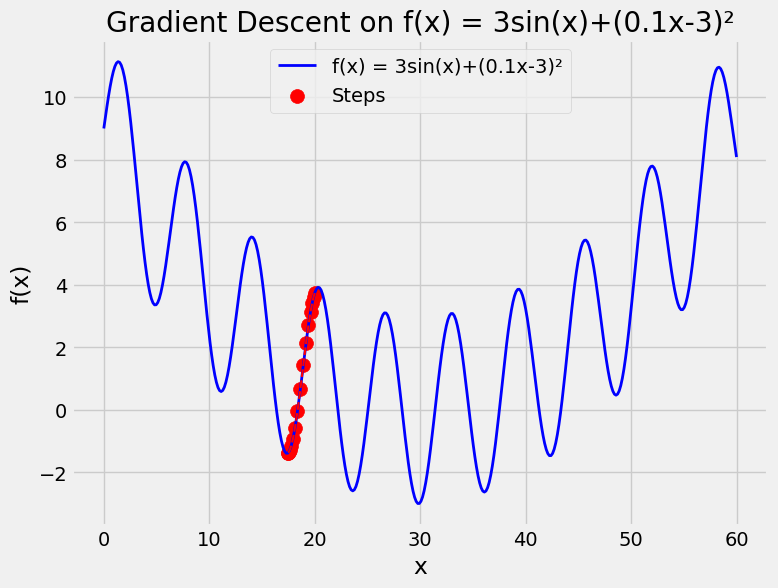

In [56]:
# Defining a simple quadratic function and its derivative
f = lambda x: 3 * np.sin(x) + (0.1 * x - 3) ** 2
f_prime = lambda x: 3 * np.cos(x) + 0.2 * (0.1 * x - 3)

# Generating values
x = np.linspace(0, 60, 400)
y = f(x)

# Gradient descent settings
learning_rate = 0.1
x_start = 20  # Starting point
steps = [x_start]
n_iterations = 15

# Gradient Descent Iteration
for _ in range(n_iterations):
    x_start = x_start - learning_rate * f_prime(x_start)
    steps.append(x_start)

# Plotting the function
plt.figure(figsize=(8, 6))
plt.plot(x, y, lw=2, color="blue", label="f(x) = 3sin(x)+(0.1x-3)²")

# Plotting the steps
plt.scatter(steps, f(np.array(steps)), color="red", s=100, label="Steps")
plt.plot(steps, f(np.array(steps)), color="red", linestyle="--", lw=1.5)

# Annotations and labels
plt.title("Gradient Descent on f(x) = 3sin(x)+(0.1x-3)²")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

# Using Gradient Descent for Regression in Machine Learning

Here we use training data for estimation of the model parameters and report the error on test data


In [57]:
# Reproduce our data
true_w0 = 1  # b in mx+b
true_w1 = 2  # m in mx+b
N = 100

# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)

epsilon = 0.1 * np.random.randn(N, 1)
y = true_w0 + true_w1 * x + epsilon
X = np.insert(x, 0, 1, axis=1)

## Train-Test Split


In [58]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [59]:
x_train.shape, y_train.shape

((80, 2), (80, 1))

(<Figure size 1200x600 with 2 Axes>,
 array([<Axes: title={'center': 'Generated Data - Train'}, xlabel='x', ylabel='y'>,
        <Axes: title={'center': 'Generated Data - Test'}, xlabel='x', ylabel='y'>],
       dtype=object))

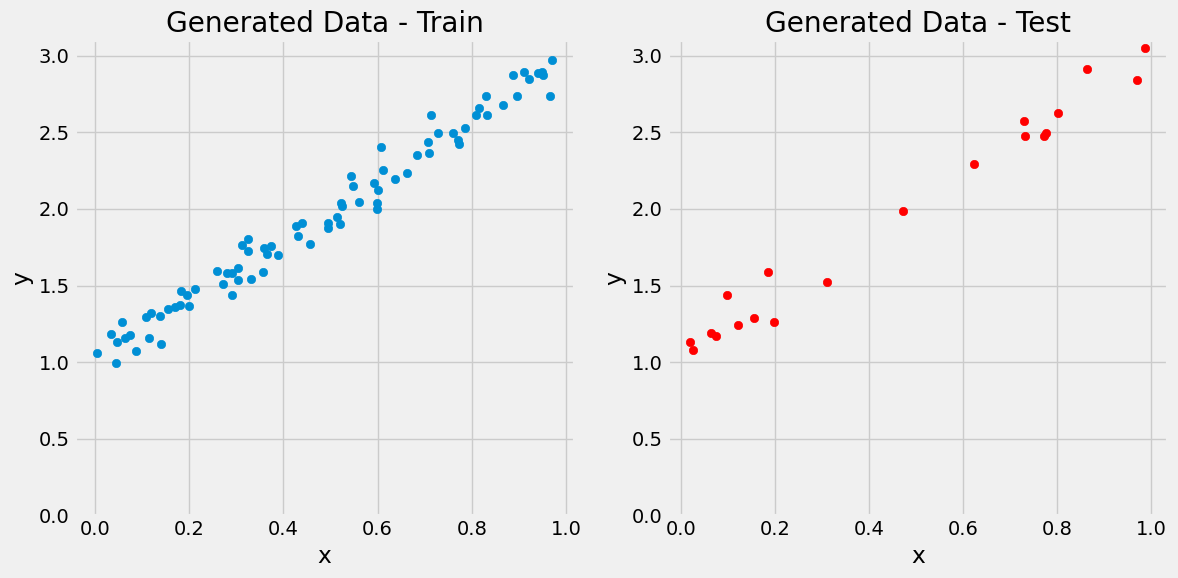

In [60]:
figure1(x_train, y_train, x_test, y_test)

## Step 0: Random Initialization


In [75]:
# Step 0 - Initializes parameters "b" and "w" randomly
np.random.seed(42)
w = np.random.randn(2, 1)
print(w)

[[ 0.49671415]
 [-0.1382643 ]]


## Step 1: Compute Model's Predictions


In [76]:
# Step 1 - Computes our model's predicted output - forward pass
# y_hat = b + m * x_train
y_hat = w[0] + w[1] * x_train[:, 1]
y_hat[:3]

array([0.39881299, 0.41404593, 0.36925186])

In [77]:
y_hat = x_train @ w
y_hat[:3]

array([[0.39881299],
       [0.41404593],
       [0.36925186]])

(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

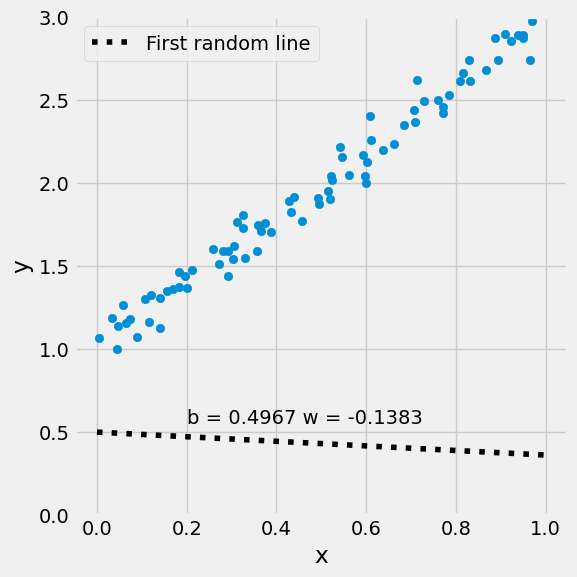

In [78]:
figure2(x_train, y_train, w[0], w[1])

## Step 2: Compute the Loss


$$

\begin{aligned}
 error_i &= \hat{y_i} - y_i\\
where:\\
y &= true\_w_0 + true\_w_1 x_1 + \epsilon\\
&\hat{y}= w_0 x_0+ w_1 x_1
\end{aligned}
$$


[2.36596945] [0.39881299]


(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

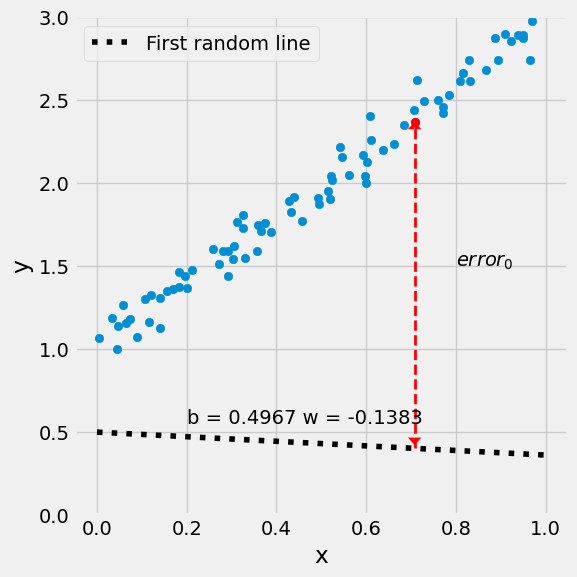

In [79]:
print(y_train[0], y_hat[0])
figure3(x_train, y_train, w[0], w[1])

$$

\begin{aligned}
MSE &= \frac{1}{n} \sum_{i=1}^n{error_i}^2
\\
&= \frac{1}{n} \sum_{i=1}^n{(\hat{y_i} - y_i)}^2
\\
&= \frac{1}{n} \sum_{i=1}^n{(w_0 x_{i,0} + w_1 x_{i,1} - y_i)}^2
\end{aligned}
$$


In [80]:
# Step 2 - Computing the loss
# We are using ALL data points, so this is BATCH gradient
# descent. How wrong is our model? That's the error!
error = y_hat - y_train
print(error.shape)
# It is a regression, so it computes mean squared error (MSE)
loss = (error**2).mean()
print(loss)

(80, 1)
2.6401126993616817


### Loss Surface


In [81]:
w0s, w1s, all_losses = mesh_losses(true_w0, true_w1, x_train, y_train)

(<Figure size 1200x600 with 2 Axes>,
 (<Axes3D: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>,
  <Axes: title={'center': 'Loss Surface'}, xlabel='b', ylabel='w'>))

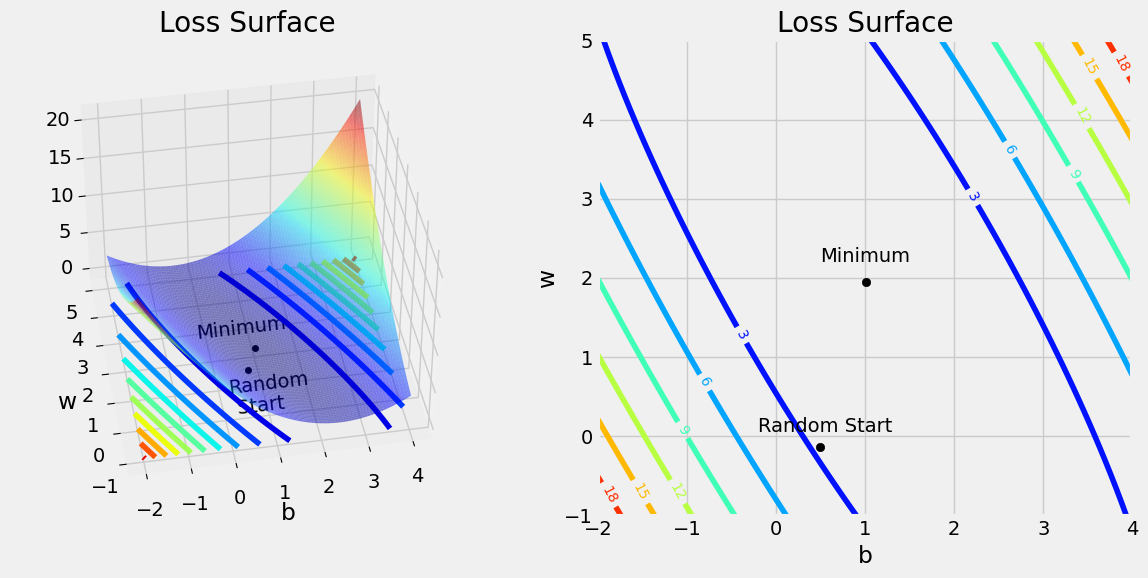

In [82]:
figure4(x_train, y_train, w[0], w[1], w0s, w1s, all_losses)

## Step 3: Compute the Gradients


$$
\begin{aligned}
\frac{\partial{MSE}}{\partial{w_j}} &= \frac{\partial{}}{\partial{w_j}}\frac{1}{n} \big(\sum_{i=1}^n{error_i}^2\big) =\frac{1}{n} \sum_{i=1}^n{\frac{\partial{error_i^2}}{\partial{w_j}}}
\\
&= \frac{1}{n} \sum_{i=1}^n{\frac{\partial{{(\hat{y_i} - y_i)}^2}}{\partial{w_j}}}
\\
&= \frac{1}{n} \sum_{i=1}^n{2\frac{\partial{(\hat{y_i} - y_i)}}{\partial{w_j}}
(\hat{y_i} - y_i)}\\
&= \frac{1}{n} \sum_{i=1}^n{2\frac{\partial{(\hat{y_i} - y_i)}}{\partial{\hat{y_i}}} \cdot \frac{\partial{\hat{y_i}}}{\partial{w_j}}
(\hat{y_i} - y_i)}
\\
&= 2 \frac{1}{n} \sum_{i=1}^n{x_{i,j} (\hat{y_i} - y_i)}= 2 \frac{1}{n} \sum_{i=1}^n{x_{i,j} error_i}
\end{aligned}
$$


In [83]:
# Step 3 - Computes gradients for both "b" and "w" parameters
w0_grad = 2 * error.mean()
# w1_grad = 2 * (x_train[:,1] * error).mean() # Wrong!
w1_grad = 2 * (np.delete(x_train, 0, axis=1) * error).mean()
print(w0_grad, w1_grad)

-3.0224384959608583 -1.7706733515907813


In [84]:
(x_train * error).shape

(80, 2)

Vectorized form


In [85]:
# w_grad = 2 * (x_train * error).mean() # Wrong
w_grad = 2 * (x_train * error).mean(axis=0)
print(w_grad.shape, w_grad)
w_grad = np.reshape(w_grad, (2, 1))
print(w_grad.shape, w_grad)

(2,) [-3.0224385  -1.77067335]
(2, 1) [[-3.0224385 ]
 [-1.77067335]]


### Backpropagation


## Step 4: Update the Parameters


$$

\begin{aligned}
& b = b - \eta \frac{\partial{MSE}}{\partial{b}}
\\
& w = w - \eta \frac{\partial{MSE}}{\partial{w}}
\end{aligned}
$$


In [86]:
print(w.shape, w_grad.shape)

(2, 1) (2, 1)


In [87]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1
print(w[0], w[1])

# Step 4 - Updates parameters using gradients and the
# learning rate
# w[0] = w[0] - lr * w0_grad
# w[1] = w[1] - lr * w1_grad
w = w - lr * w_grad

print(w)
print(w[0])

[0.49671415] [-0.1382643]
[[0.798958  ]
 [0.03880303]]
[0.798958]


(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

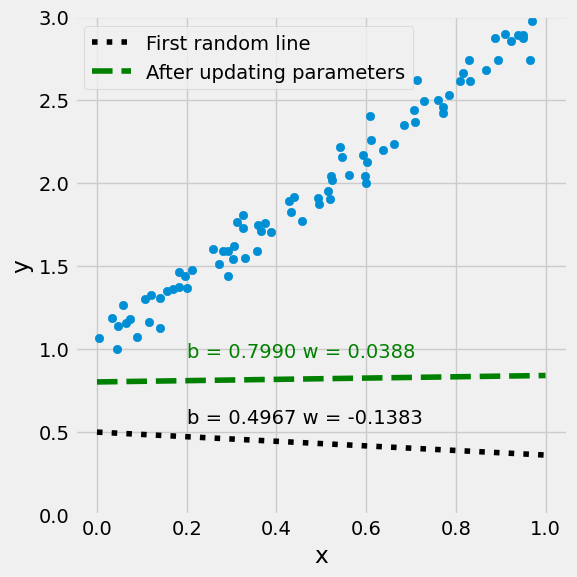

In [88]:
figure9(x_train, y_train, w[0], w[1])

## Step 5: Repeat the above updating!


In [89]:
# Initializes parameters "b" and "w" randomly
np.random.seed(42)
w = np.random.randn(2, 1)
lr = 0.3
num_epochs = 50
Losses = np.empty(num_epochs)
for epoch in range(num_epochs):
    y_hat = x_train @ w
    error = y_hat - y_train
    loss = (error**2).mean()
    Losses[epoch] = loss
    w_grad = 2 * (x_train * error).mean(axis=0)
    w_grad = np.reshape(w_grad, (2, 1))
    w = w - lr * w_grad

w

array([[1.11648206],
       [1.75056848]])

(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

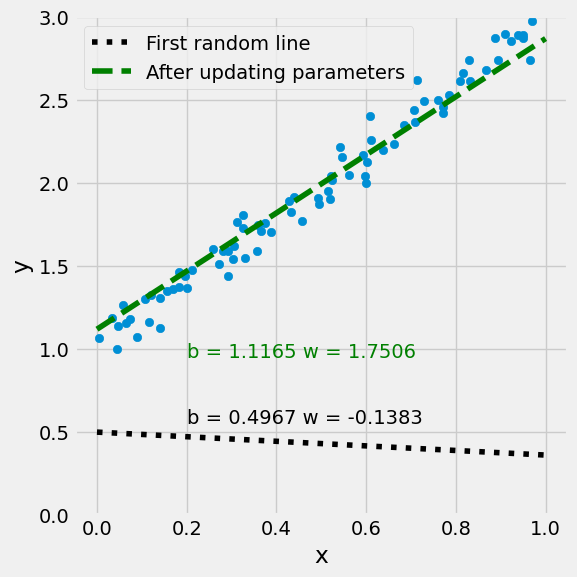

In [90]:
figure9(x_train, y_train, w[0], w[1])

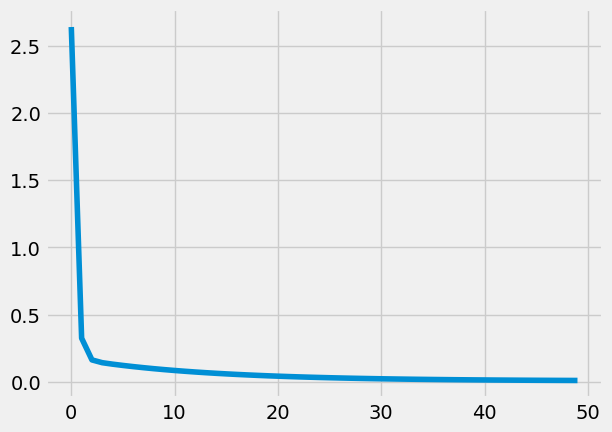

In [91]:
plt.plot(Losses)

# Using PyTorch auto grad


- PyTorch is a Python-based tool for scientific computing that provides several main features:
  - `torch.Tensor`, an n-dimensional array similar to that of `numpy`, but which can run on GPUs
  - Computational graphs for building neural networks
  - Automatic differentiation for training neural networks (more on this next lecture)
- You can install PyTorch from: https://pytorch.org/


In [92]:
import torch
from torch import autograd

# Initializes parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

b = torch.tensor(b, requires_grad=True)
w = torch.tensor(w, requires_grad=True)
xTrain = torch.tensor(x_train)  # xTrain is a pyTorch Tensor
yTrain = torch.tensor(y_train)  # yTrain is a pyTorch Tensor

## Backward

Differntiationg using backward function

https://pytorch.org/tutorials/beginner/pytorch_with_examples.html


In [93]:
np.random.seed(42)
w = np.random.randn(2, 1)

w = torch.tensor(w, requires_grad=True)
xTrain = torch.tensor(x_train)  # xTrain is a pyTorch Tensor
yTrain = torch.tensor(y_train)  # yTrain is a pyTorch Tensor

lr = 0.3
num_epochs = 50
for epoch in range(num_epochs):
    y_hat = xTrain @ w
    error = y_hat - yTrain
    loss = (error**2).mean(axis=0)
    # محاسبه دستی مشتق را حذف کرده و به جاش مشتق خودکار را قرار می دهیم
    loss.backward()
    with torch.no_grad():
        w -= lr * w.grad
        # Manually zero the gradients after updating weights
        w.grad = None

w

tensor([[1.1165],
        [1.7506]], dtype=torch.float64, requires_grad=True)

https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

- PyTorch: Defining new autograd functions
- PyTorch: nn module
- PyTorch: optim
- PyTorch: Custom nn Modules


## Using PyTorch library


In [94]:
import torch
import torch.nn as nn

# اگر از نوع دابل باشد خطا خواهیم گرفت
# x_train.dtype is float64
xTrain = torch.tensor(x_train, dtype=torch.float32)
yTrain = torch.tensor(y_train, dtype=torch.float32)

# همان مدل ساده قبلی با یک ورودی و یک خروجی، بایاس دارد
# در وضعیت جدید که یک ستون به داده‌ها اضافه کرده‌ایم، یا باید فقط از ستون دوم استفاده کنیم
# یا مدل را بدون بایاس تعریف کنیم
model = nn.Linear(2, 1, bias=False)

learning_rate = 0.3
f = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

num_epochs = 50
for epoch in range(num_epochs):
    y_hat = model(xTrain)
    loss = f(y_hat, yTrain)
    loss.backward()  # backward propagation: calculate gradients
    optimizer.step()  # update the weights
    optimizer.zero_grad()  # clear out the gradients from the last step loss.backward()

In [95]:
print(model)
print(model.bias)
print(model.weight)
print(model.weight[0])
print(model.weight[0][0])
print(model.weight[0][0].item())
print(model.weight[0].detach().numpy()[0])

Linear(in_features=2, out_features=1, bias=False)
None
Parameter containing:
tensor([[1.0368, 1.9074]], requires_grad=True)
tensor([1.0368, 1.9074], grad_fn=<SelectBackward0>)
tensor(1.0368, grad_fn=<SelectBackward0>)
1.0367742776870728
1.0367743


(<Figure size 600x600 with 1 Axes>, <Axes: xlabel='x', ylabel='y'>)

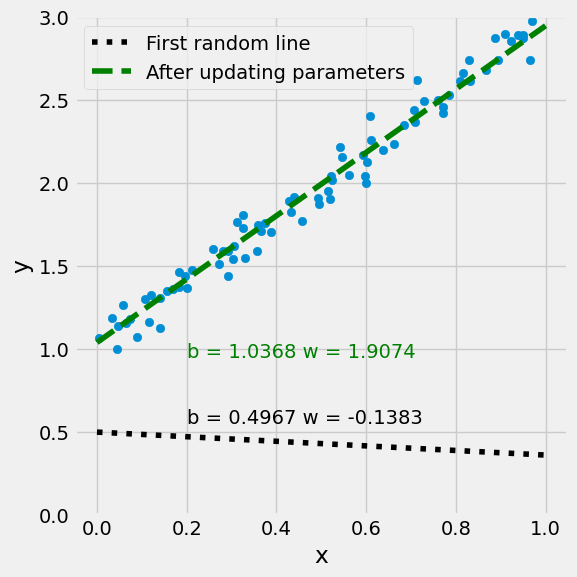

In [96]:
w = model.weight[0].detach().numpy()
w = np.reshape(w, (2, 1))
figure9(x_train, y_train, w[0], w[1])

## Example: Automatic Differentiation for 1D Function Alignment

A simple yet illustrative application of **automatic differentiation (AD)** is aligning two one–dimensional functions.  
Suppose we observe two signals:

- an original function $ f(x) $
- a shifted version of it $ g(x) = f(x - \tau_{\text{true}}) $

We do not know the true shift $ \tau_{\text{true}} $.  
Our goal is to estimate a parameter $ t $ such that the shifted function

$$
f_t(x) = f(x - t)
$$

aligns with $ g(x) $.  
This leads to the optimization problem:

$$
L(t) = \sum_x \left( f(x - t) - g(x) \right)^2.
$$

Note that the derivative  

$$
\frac{\partial}{\partial t} f(x - t) = - f'(x - t)
$$

can be complicated or not analytically available if $ f $ is given only as sampled data.  
**Automatic differentiation** computes the gradient $ \frac{dL}{dt} $ automatically, allowing us to solve the alignment problem with **gradient descent** on a single parameter.

Below is a sequence of plots showing the original functions $ f $ and $ g $ and the gradual alignment of $ f(x - t) $ as the optimization progresses.


In [ ]:
import torch

x = torch.linspace(-3, 3, 300)

f = torch.sin(x)                   
true_shift = 0.8
g = torch.sin(x - true_shift)       

t = torch.tensor(0.0, requires_grad=True)

optimizer = torch.optim.SGD([t], lr=0.1)

for step in range(40):
    optimizer.zero_grad()

    f_shifted = torch.sin(x - t)     # f(x - t)
    loss = ((f_shifted - g)**2).mean()

    loss.backward()
    optimizer.step()

print("Estimated shift =", t.item())


Estimated shift = 0.7867217063903809


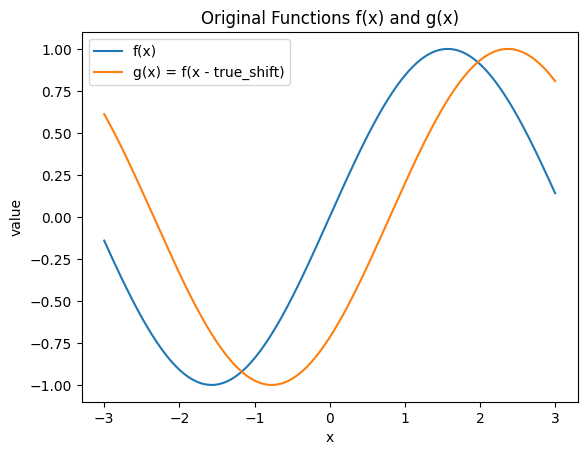

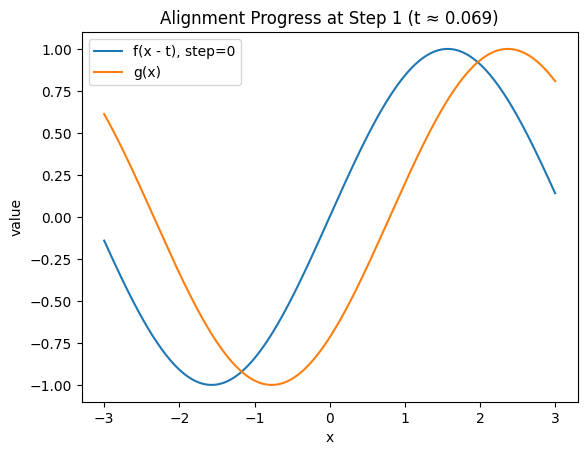

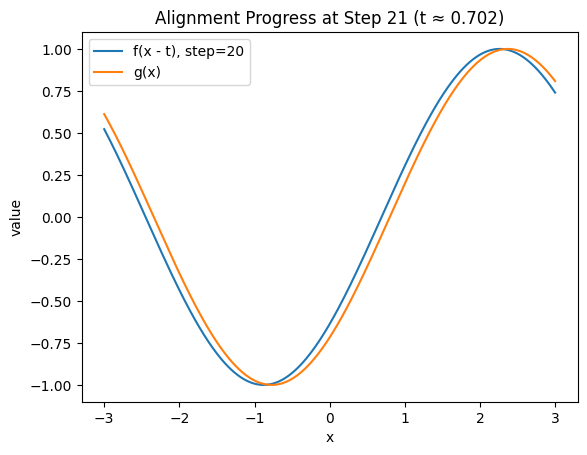

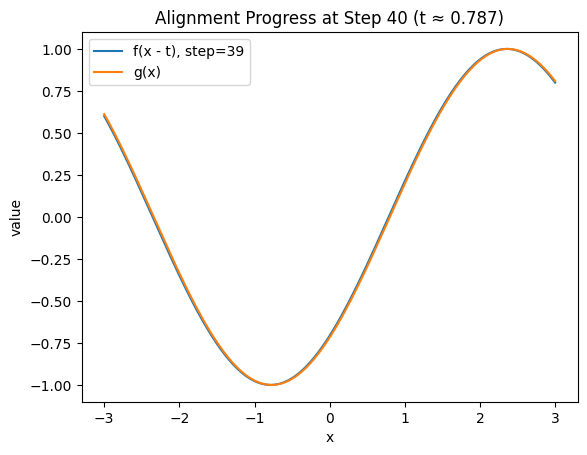

In [ ]:
import torch
import matplotlib.pyplot as plt

# Create the x-axis
x = torch.linspace(-3, 3, 300)

# Define the original function f and its shifted version g
f = torch.sin(x)
true_shift = 0.8
g = torch.sin(x - true_shift)

# Learnable parameter: horizontal shift t
t = torch.tensor(0.0, requires_grad=True)

optimizer = torch.optim.SGD([t], lr=0.1)

# Store intermediate curves for visualization
history = []

for step in range(40):
    optimizer.zero_grad()

    # Shifted function: f(x - t)
    f_shifted = torch.sin(x - t)

    # Mean squared error loss
    loss = ((f_shifted - g)**2).mean()

    loss.backward()
    optimizer.step()

    # Save plots every few steps
    if step % 20 == 0 or step == 39:
        history.append((step, t.item(), f_shifted.detach().clone()))

# print("Estimated shift =", t.item())

# ---- Plot the original functions f and g ----
plt.figure()
plt.plot(x, f, label="f(x)")
plt.plot(x, g, label="g(x) = f(x - true_shift)")
plt.legend()
plt.title("Original Functions f(x) and g(x)")
plt.xlabel("x")
plt.ylabel("value")
plt.show()

# ---- Plot the alignment progress ----
for step, t_val, shifted_curve in history:
    plt.figure()
    plt.plot(x, shifted_curve, label=f"f(x - t), step={step}")
    plt.plot(x, g, label="g(x)")
    plt.legend()
    plt.title(f"Alignment Progress at Step {step+1} (t ≈ {t_val:.3f})")
    plt.xlabel("x")
    plt.ylabel("value")
    plt.show()



## Application: Graph Layout with Autograd

In the previous section, we used **Gradient Descent** to find the optimal line parameters ($w, b$) that minimize the prediction error. However, automatic differentiation (`autograd`) is a general tool that can optimize *any* differentiable objective function, not just regression errors.

To demonstrate this, let's solve a geometric problem: **Force-Directed Graph Drawing**.

### The Problem

Imagine we have a graph $G=(V, E)$ representing connections between objects. We want to visualize this graph on a 2D plane. If we place the nodes randomly, the result is a messy "hairball." We want to find the optimal coordinates $X \in \mathbb{R}^{|V| \times 2}$ that make the graph look organized.

### The Math: Defining "Energy"

We can model this physical system using two forces, resulting in an objective function $L(X)$ that we want to **minimize**:

1.  **Attraction (Springs):** Connected nodes $(i, j) \in E$ should be close to each other.

    $$L_{attract} = \sum_{(i,j) \in E} \|x_i - x_j\|^2$$

2.  **Repulsion (Electrostatic):** All nodes should repel each other to prevent overlap.

    $$L_{repulse} = \sum_{i \neq j} \frac{1}{\|x_i - x_j\| + \epsilon}$$

The total loss function is:

$$L(X) = L_{attract} + \lambda L_{repulse}$$

Instead of manually calculating the complex gradients $\nabla_X L$ for every coordinate, we simply define this energy function in PyTorch and let `autograd` move the nodes to their optimal positions.


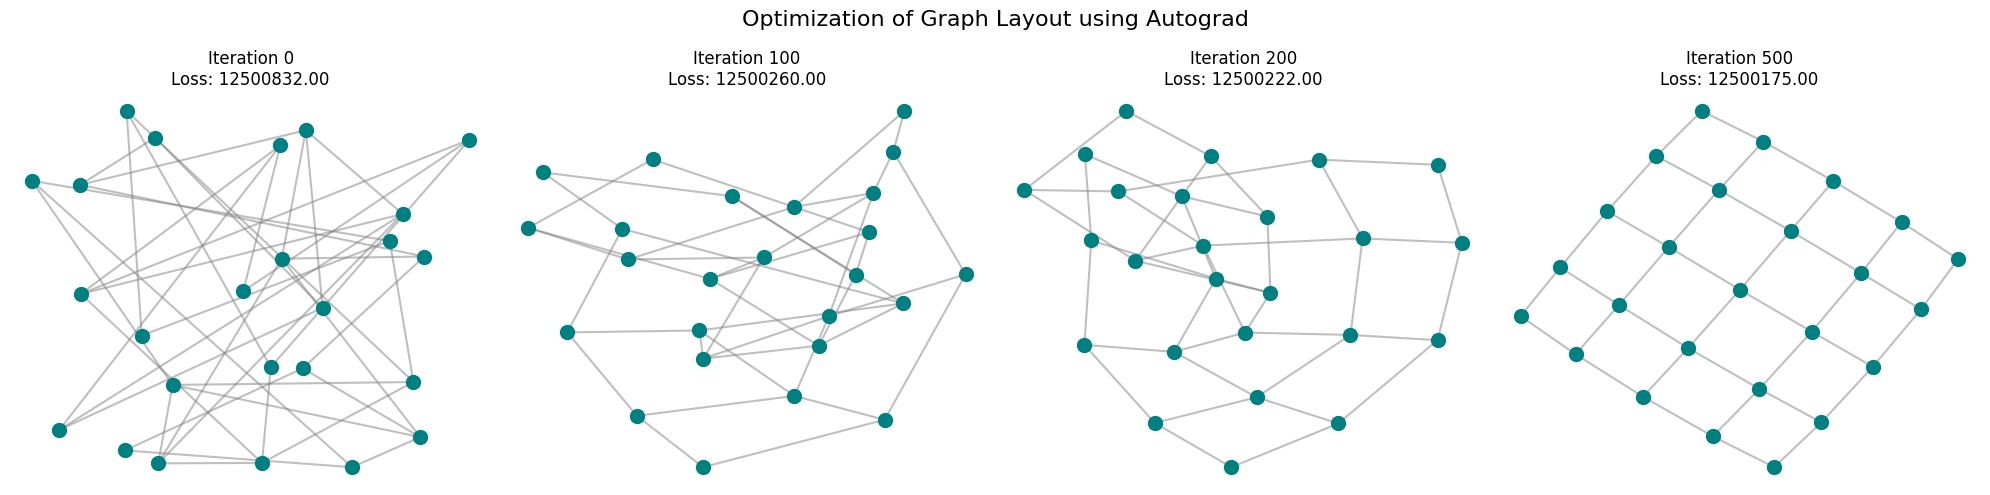

In [ ]:
import torch
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# --- 1. Setup Data: Create a Grid Graph ---
# We use a grid because it has a clear structure that we want to recover.
n_side = 5
G = nx.grid_2d_graph(n_side, n_side)
nodes = list(G.nodes())
# Map 2D grid coordinates to indices 0..N-1
node_to_idx = {node: i for i, node in enumerate(nodes)}
N = len(nodes)

# Convert edges to a tensor of shape (num_edges, 2)
edge_list = []
for u, v in G.edges():
    edge_list.append([node_to_idx[u], node_to_idx[v]])
edges = torch.tensor(edge_list, dtype=torch.long)

# --- 2. Initialize Coordinates Randomly ---
# X represents the (x, y) coordinates of our N nodes.
# We want to optimize X, so requires_grad=True.
torch.manual_seed(40)
X = torch.rand(N, 2, requires_grad=True)

# Using Adam optimizer (acts like Gradient Descent with momentum)
optimizer = torch.optim.Adam([X], lr=0.1)

# --- 3. Visualization Setup ---
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
steps_to_plot = [0, 100, 200, 500] # Iterations to visualize

# --- 4. Optimization Loop ---
for step in range(501):
    optimizer.zero_grad()
    
    # Calculate all pairwise differences: X_i - X_j
    # Shape becomes (N, N, 2) via broadcasting
    diff = X.unsqueeze(1) - X.unsqueeze(0)
    
    # Euclidean distance between all pairs
    # Add small epsilon to avoid division by zero
    dist = torch.norm(diff, dim=2) + 1e-6
    
    # --- The Energy Function ---
    
    # 1. Attraction: Minimize distance for connected edges
    # We gather distances only for pairs present in 'edges'
    edge_distances = dist[edges[:, 0], edges[:, 1]]
    loss_attraction = (edge_distances ** 2).sum()
    
    # 2. Repulsion: Maximize distance for ALL pairs (inverse distance)
    # We ignore the diagonal (distance to self is 0) by masking or just sum all
    # Since 1/0 is handled by epsilon, we sum everything.
    loss_repulsion = (1.0 / dist).sum()
    
    # Total Loss: Combine forces
    # We weigh repulsion slightly less to keep the graph compact
    loss = loss_attraction + 0.5 * loss_repulsion
    
    # --- Autograd Magic ---
    loss.backward()
    optimizer.step()
    
    # --- Plotting ---
    if step in steps_to_plot:
        idx = steps_to_plot.index(step)
        ax = axes[idx]
        
        # Detach tensor to numpy for plotting
        pos = X.detach().numpy()
        
        # Draw edges
        for e in edge_list:
            p1, p2 = pos[e[0]], pos[e[1]]
            ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'gray', alpha=0.5, zorder=1)
            
        # Draw nodes
        ax.scatter(pos[:, 0], pos[:, 1], c='teal', s=100, zorder=2)
        ax.set_title(f"Iteration {step}\nLoss: {loss.item():.2f}")
        ax.axis('off')

plt.suptitle("Optimization of Graph Layout using Autograd", fontsize=16)
plt.tight_layout()
plt.show()

**Further Reading:**

- [Neural Networks from scratch](https://aegeorge42.github.io/)
- [Persian paper: The Application of Taylor Expansion in Reducing the Size of Convolutional Neural Networks for Classifying Impressionism and Miniature Style Paintings](https://math-sci.ui.ac.ir/article_25351.html)
- [Why use gradient descent for linear regression, when a closed-form math solution is available?](https://stats.stackexchange.com/questions/278755/why-use-gradient-descent-for-linear-regression-when-a-closed-form-math-solution)
- [Least Squares (In Persian)](https://fa.wikipedia.org/wiki/%DA%A9%D9%85%D8%AA%D8%B1%DB%8C%D9%86_%D9%85%D8%B1%D8%A8%D8%B9%D8%A7%D8%AA)
- [More about optimization](appendixF_pytorch-optimizers.ipynb)
- [Regression with Neural Networks in PyTorch](https://medium.com/@benjamin.phillips22/simple-regression-with-neural-networks-in-pytorch-313f06910379)
- Some of the previous MSc thesis related to regression (In Persian):
  - [Image segmentation using image matting method](http://hcloud.hsu.ac.ir/index.php/s/r2wBo5milwFs0H1)
  - [Parallel version of dual gradient method in distributed and shared environments](http://hcloud.hsu.ac.ir/index.php/s/B4oT53TfOknyNEg)
  - [Extreme learning machines](http://hcloud.hsu.ac.ir/index.php/s/NClEjAIfIDgmrEm)
  - [Image Matting](http://hcloud.hsu.ac.ir/index.php/s/OaHkkTSsO8mNrk0)
  - [Identifying video background frames using QR decomposition](http://hcloud.hsu.ac.ir/index.php/s/7nQmOqhcuN7hTNS)
